# Optimal Sizing of Nuclear Reactor for Embedded Grid Systems

This notebook executes all Temoa experiments and generates all plots for the Optimal Sizing paper.

Before beginning, you must have Temoa installed and the Temoa conda environment activated.

See the [Temoa Website](https://temoacloud.com/download/) for more information.

In [1]:
!snakemake --cores=4

Building DAG of jobs...
Nothing to be done.
Complete log: /home/dotson/research/pride/temoa-uiuc/.snakemake/log/2020-07-21T112555.651030.snakemake.log


In [2]:
from data_parser import get_output_files
from data_parser import make_plots

In [3]:
output = get_output_files()

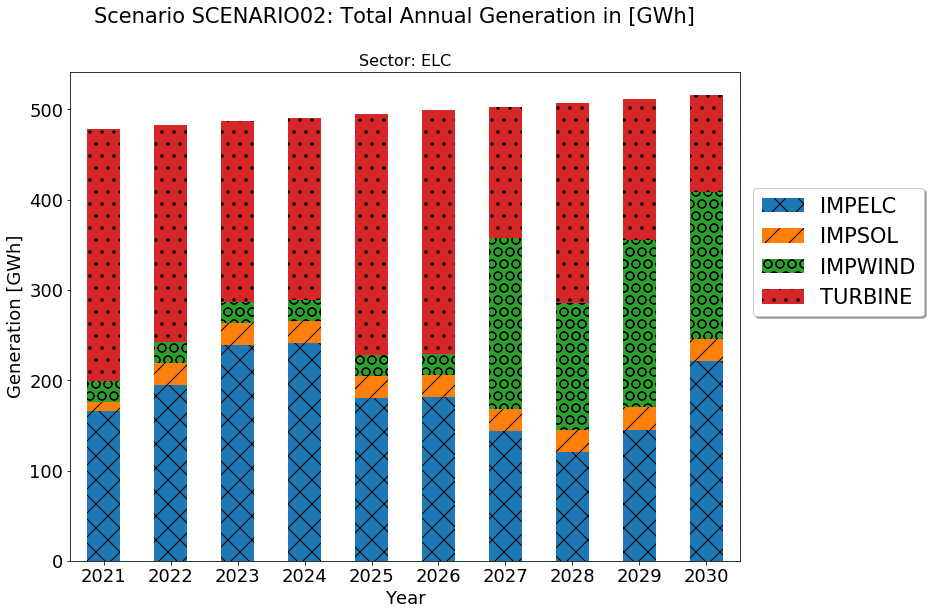

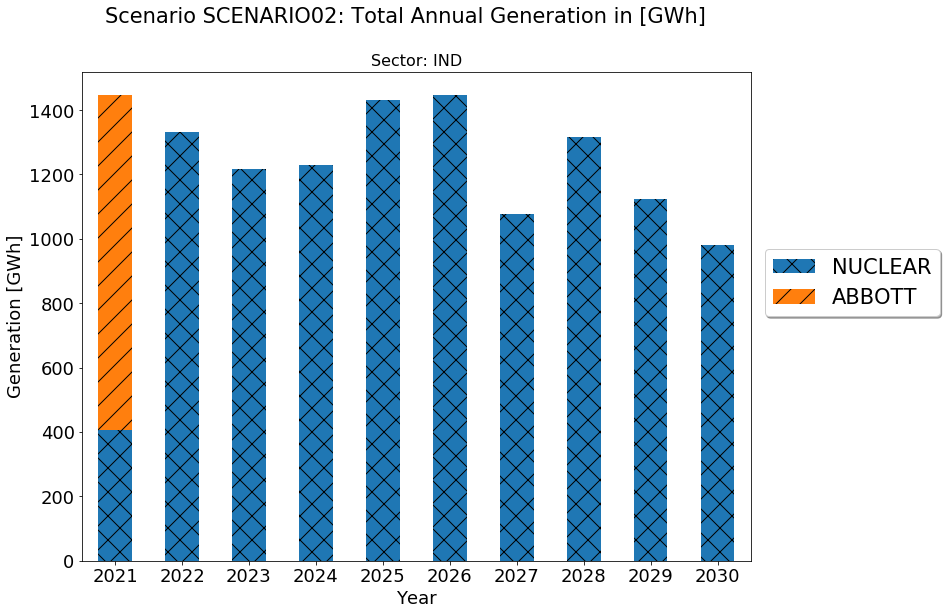

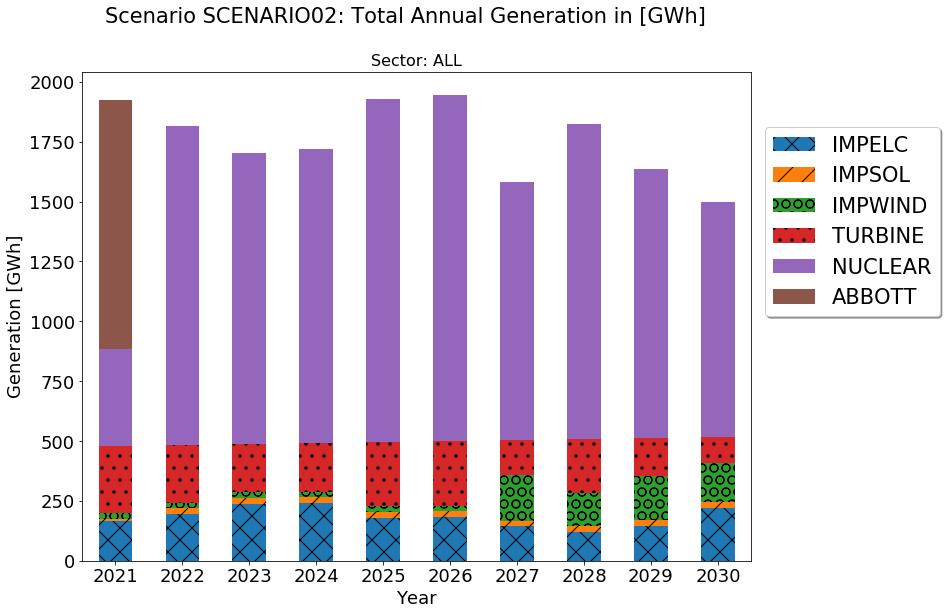

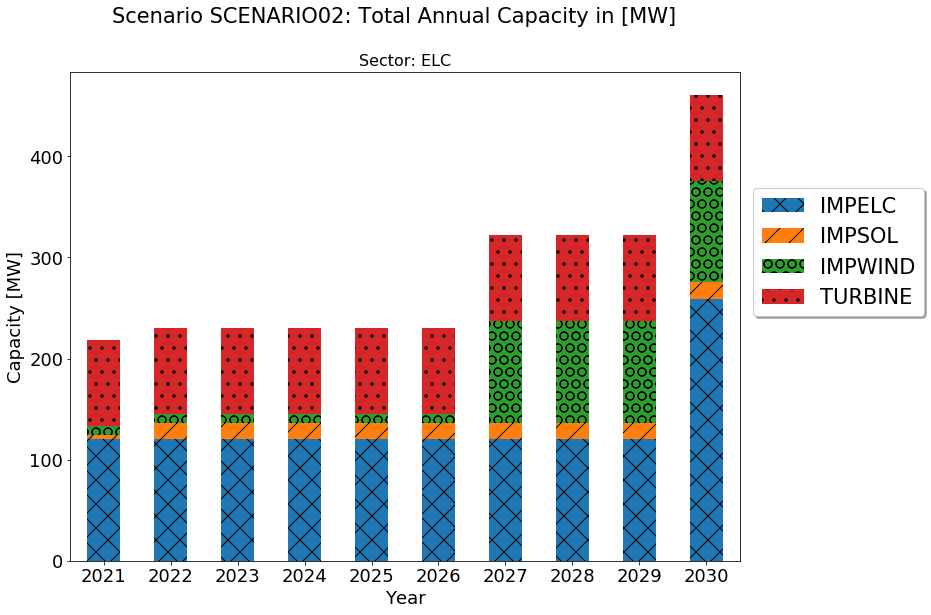

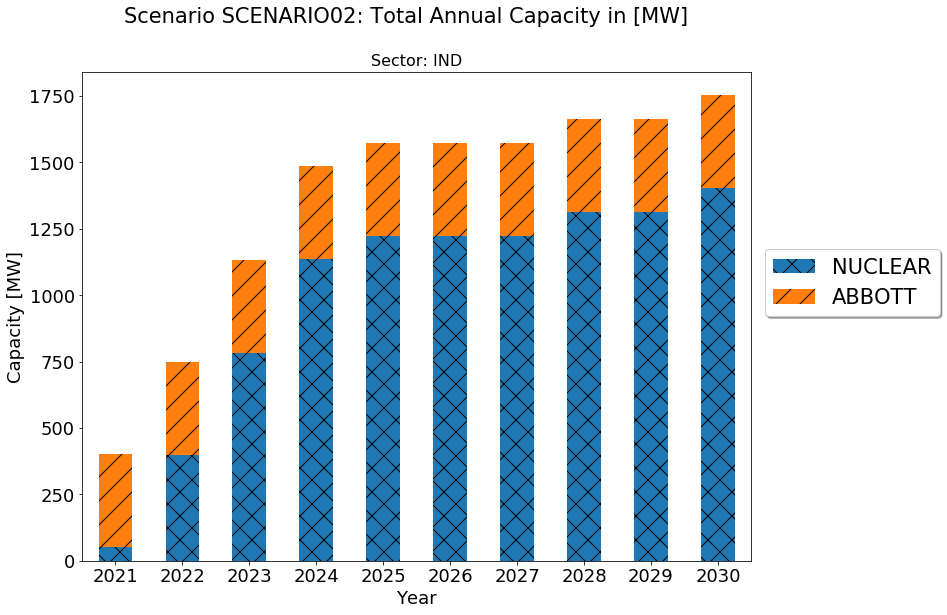

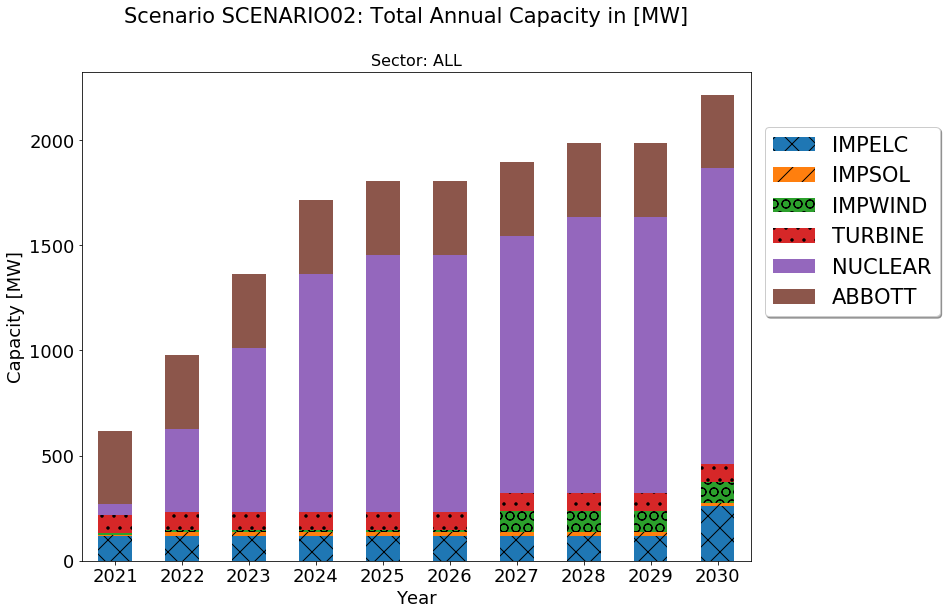

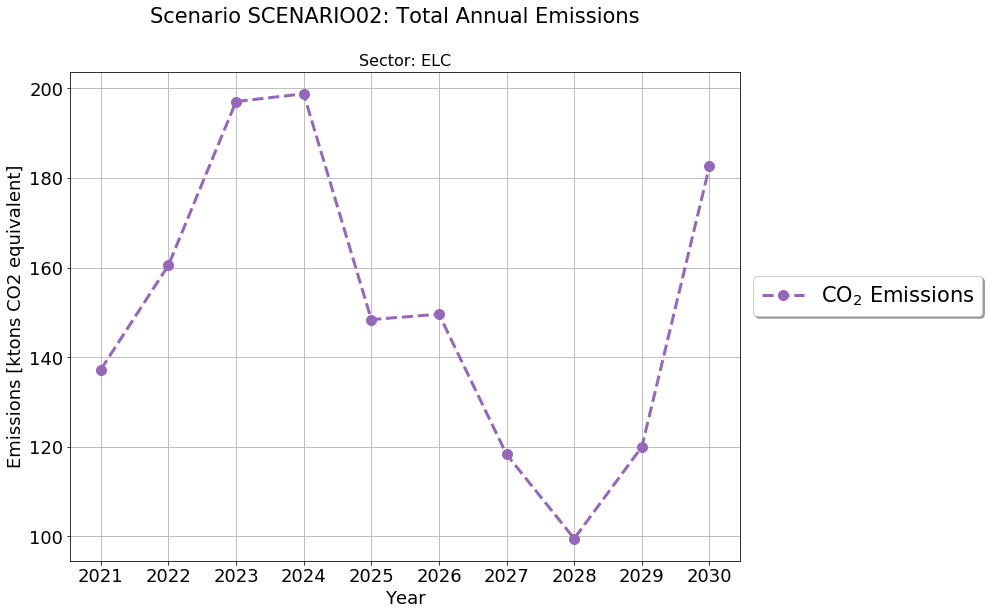

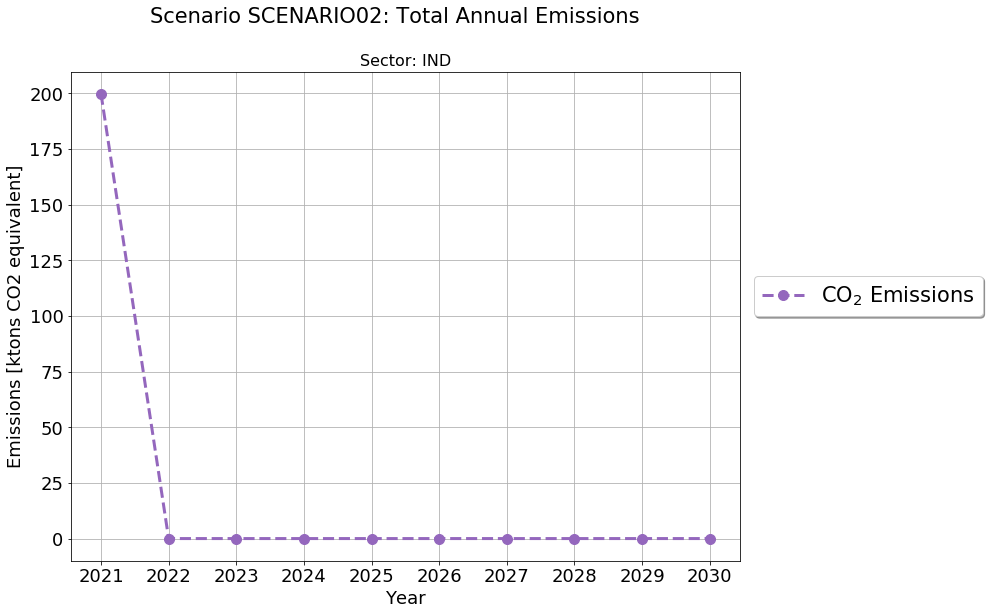

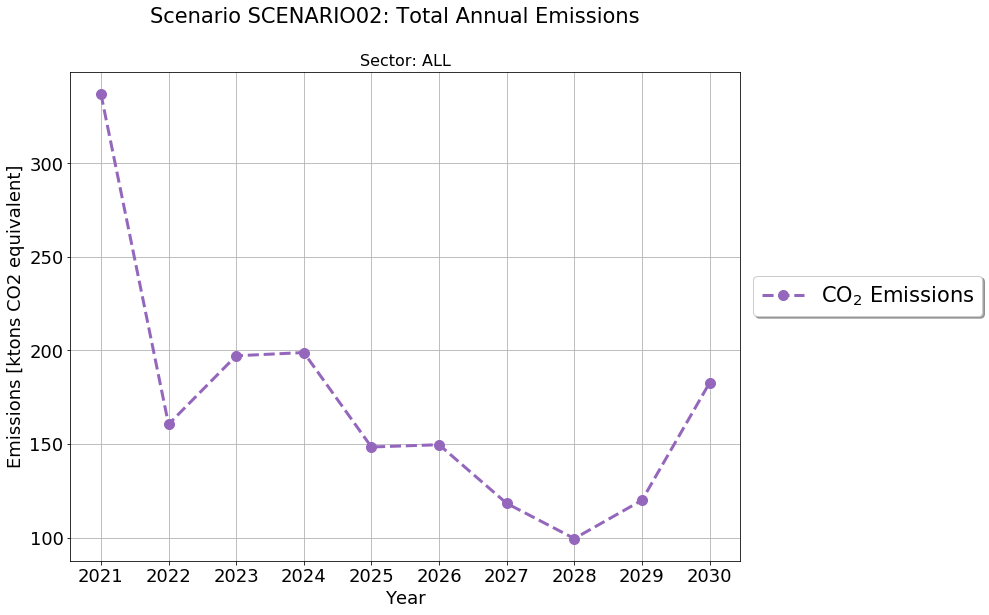

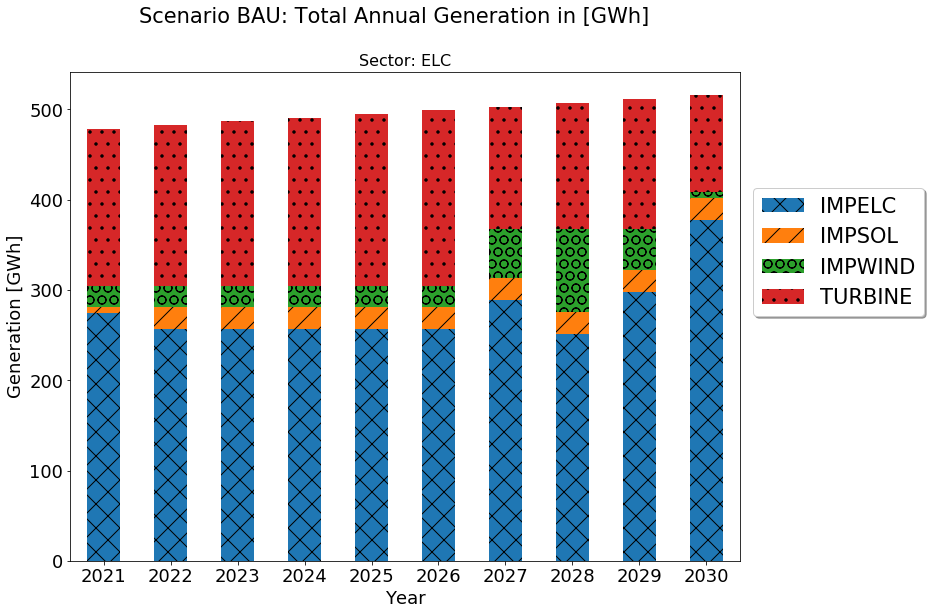

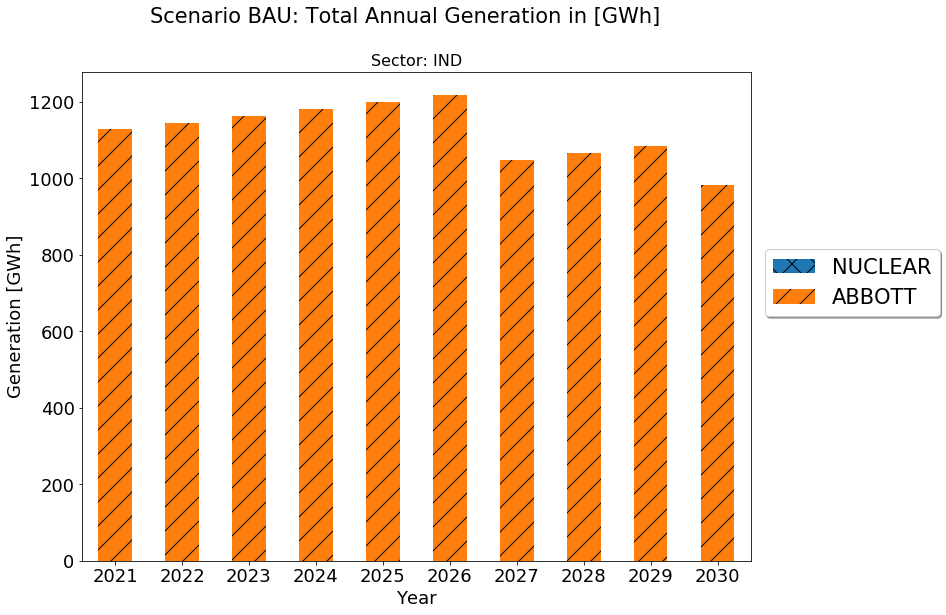

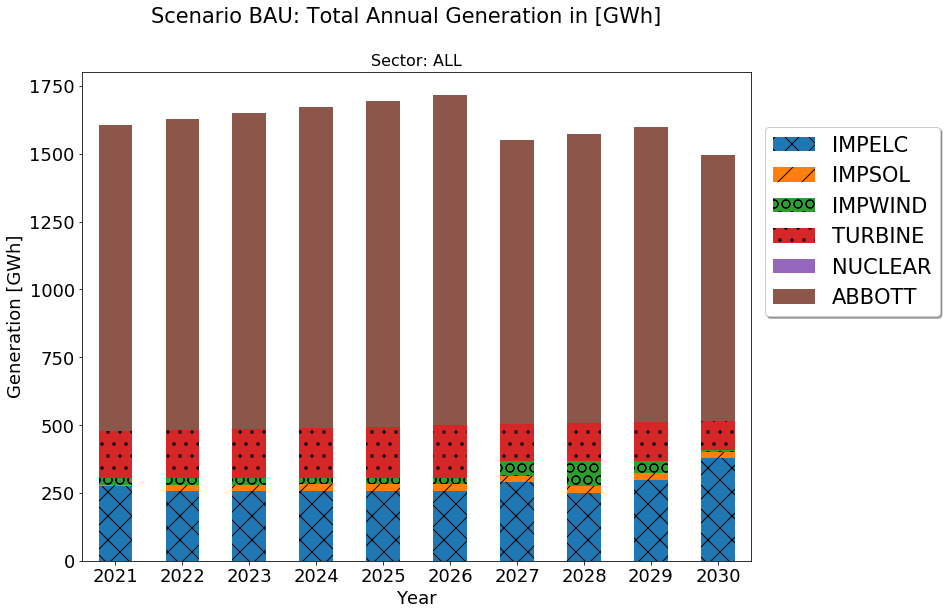

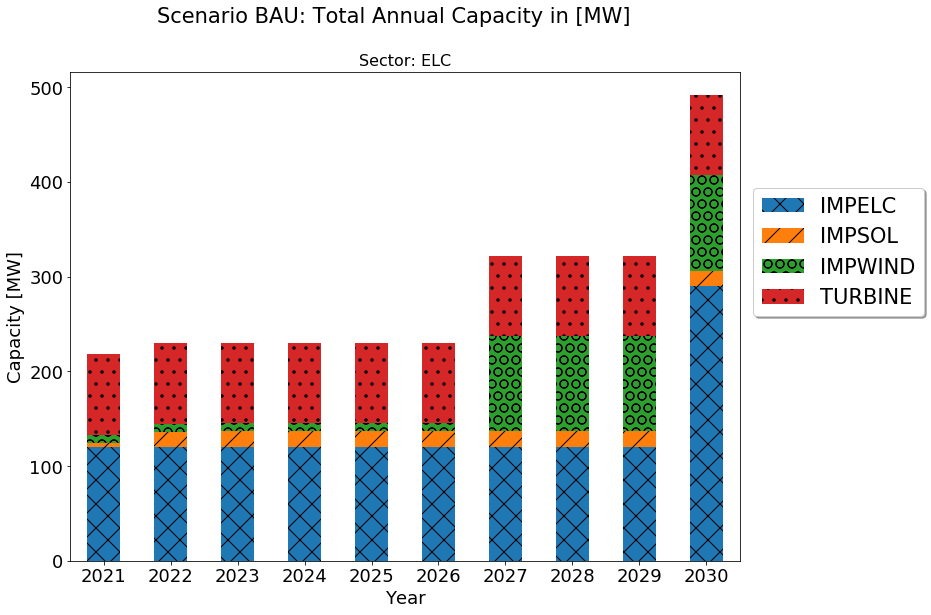

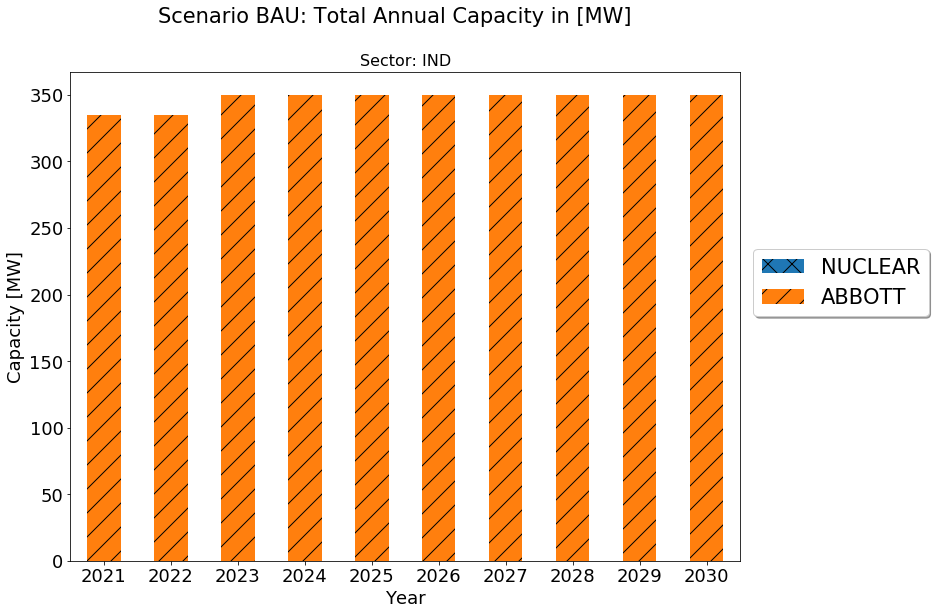

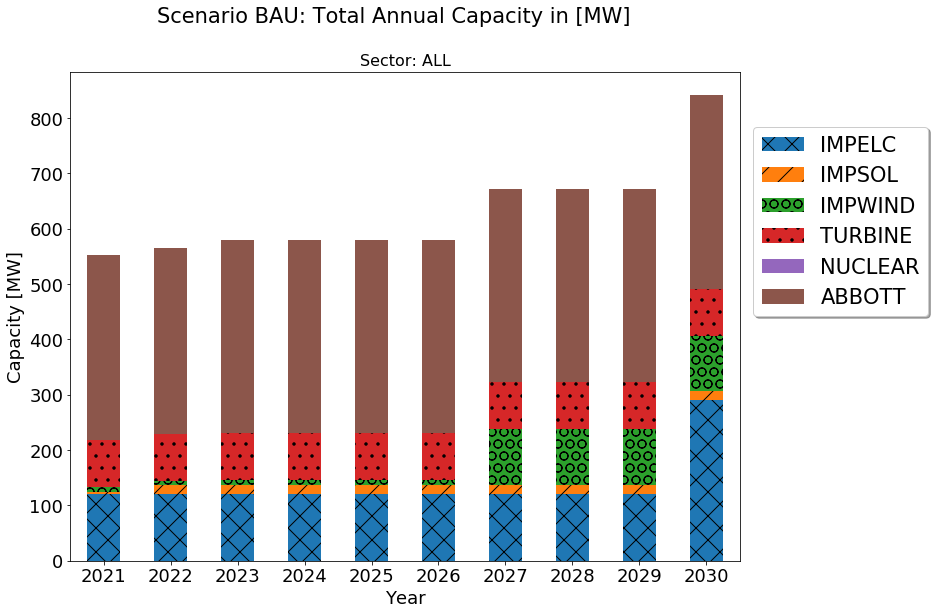

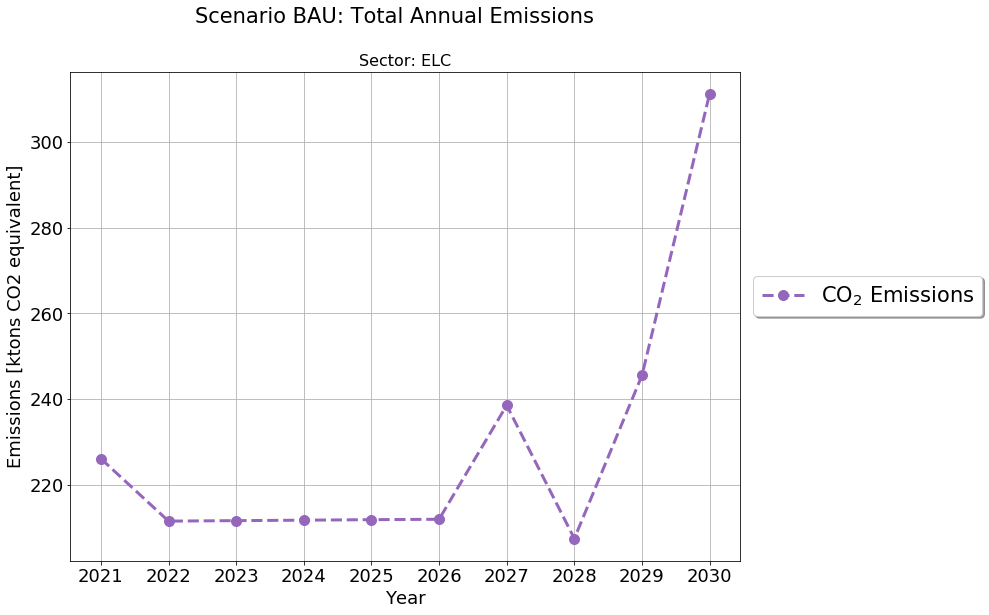

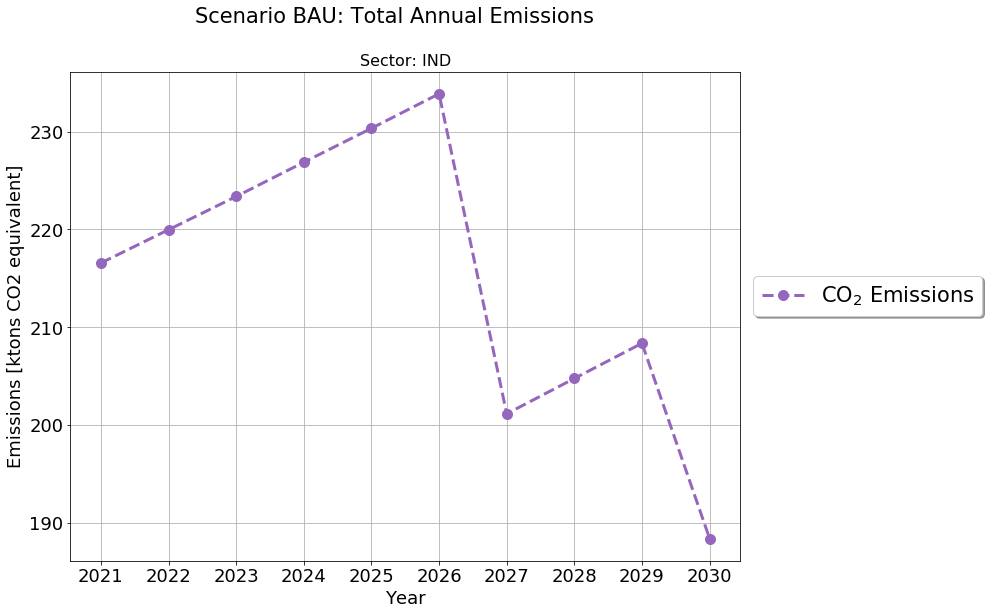

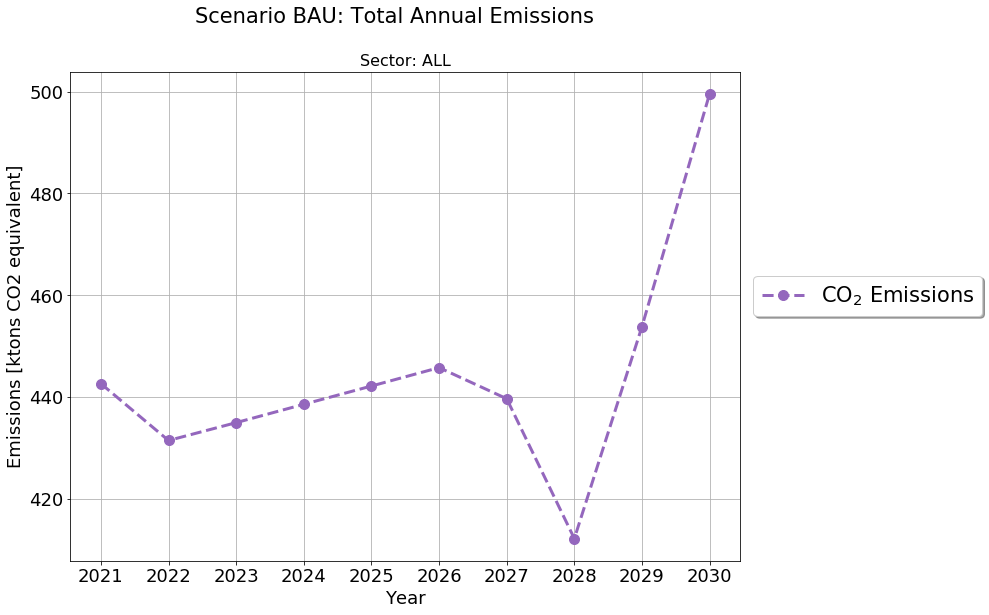

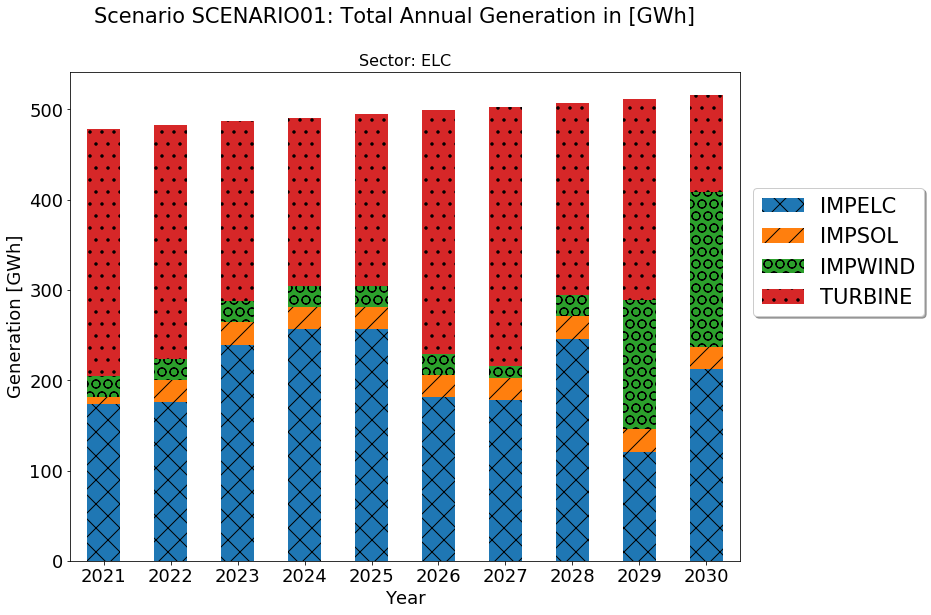

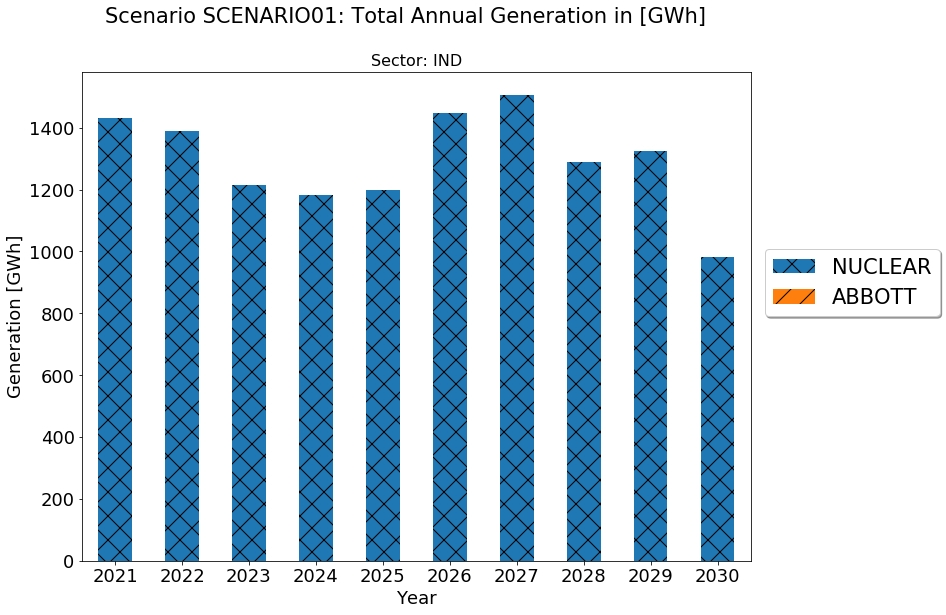

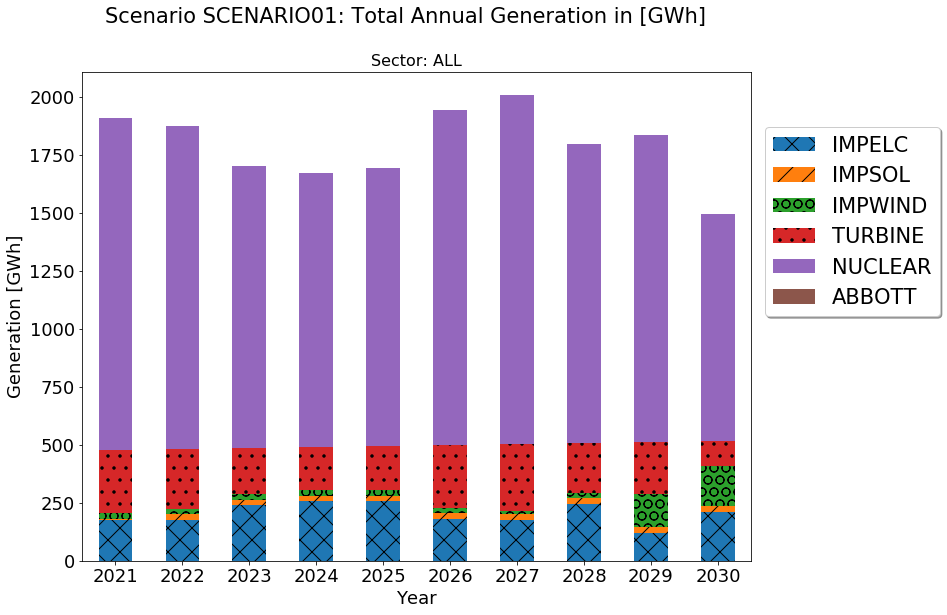

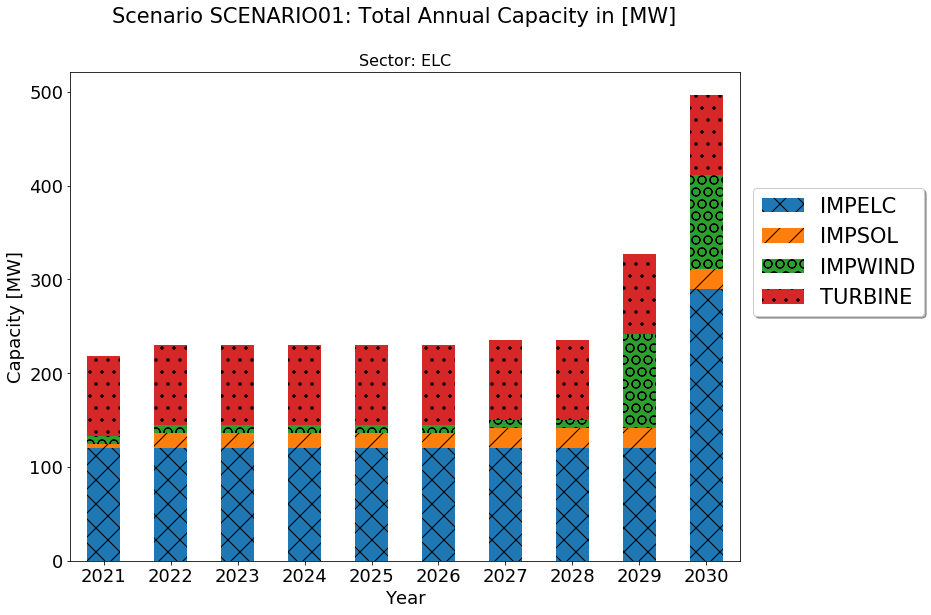

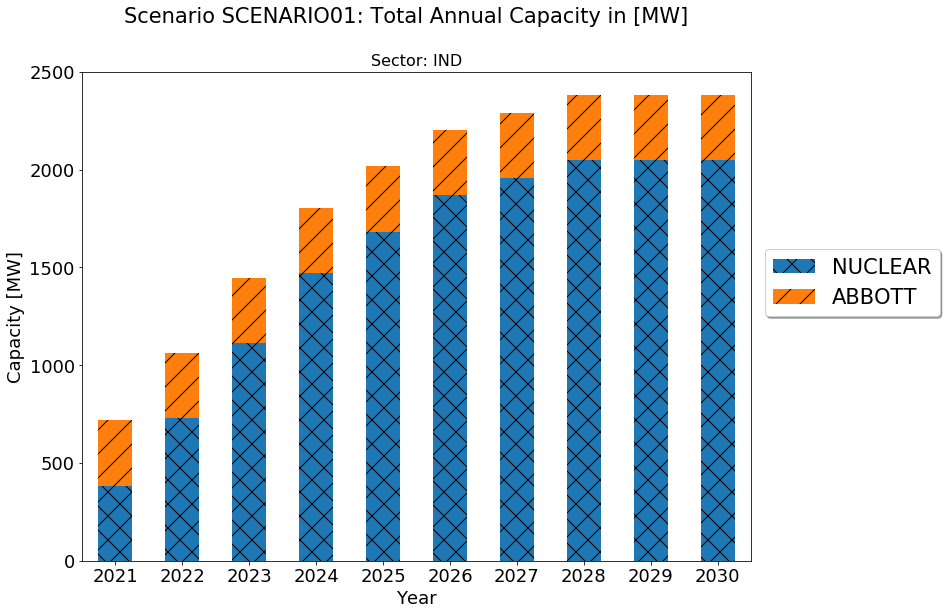

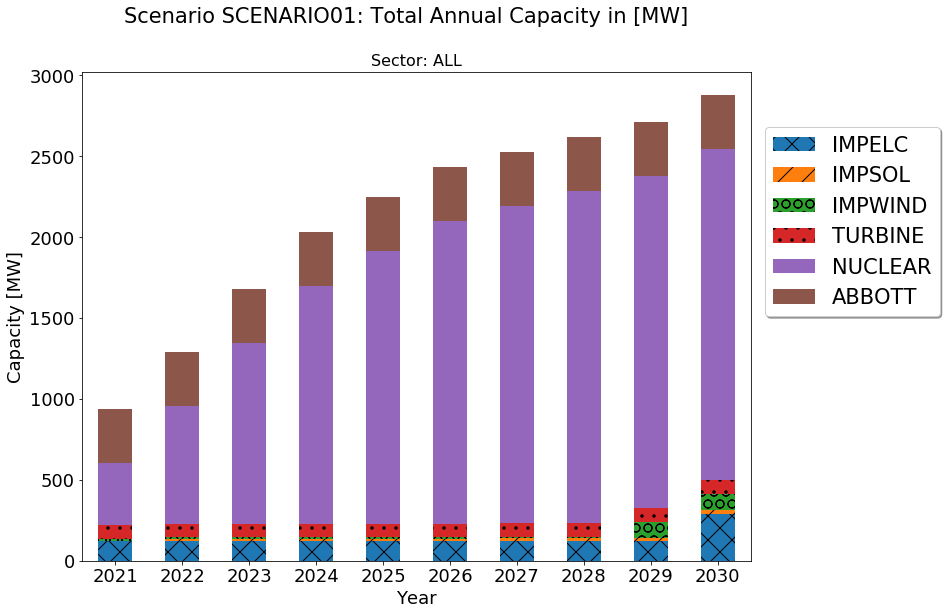

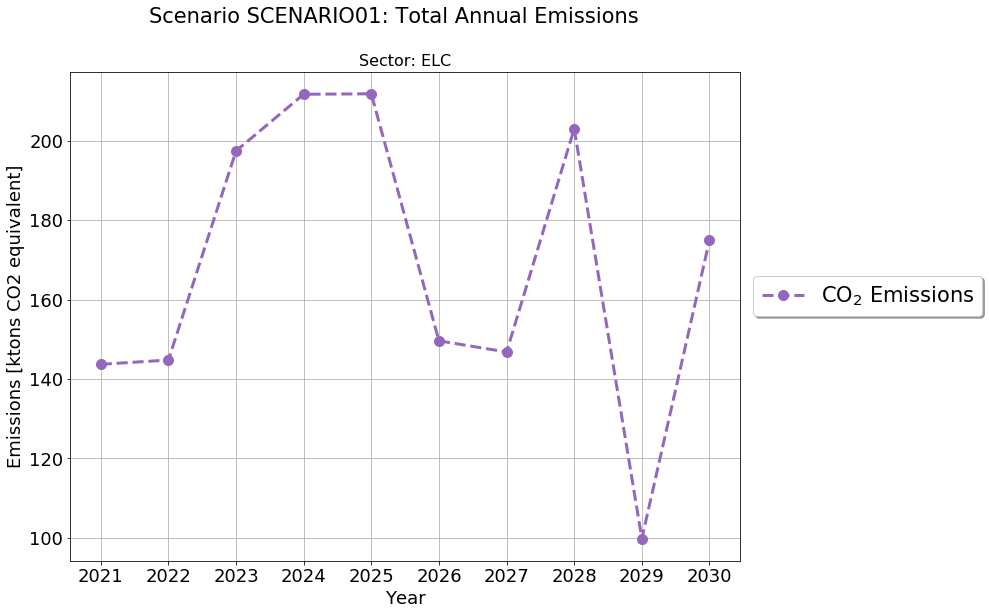

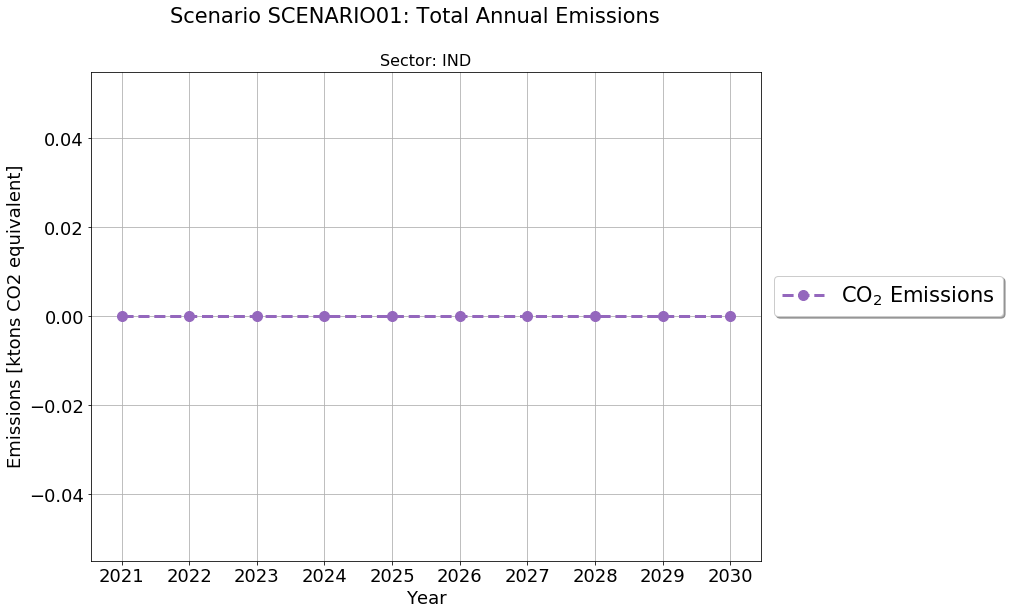

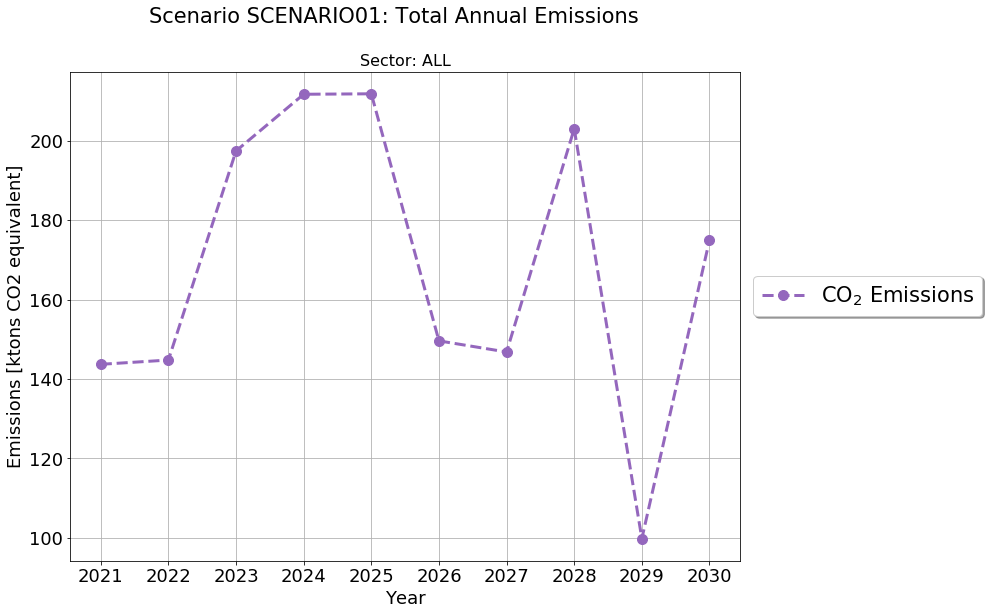

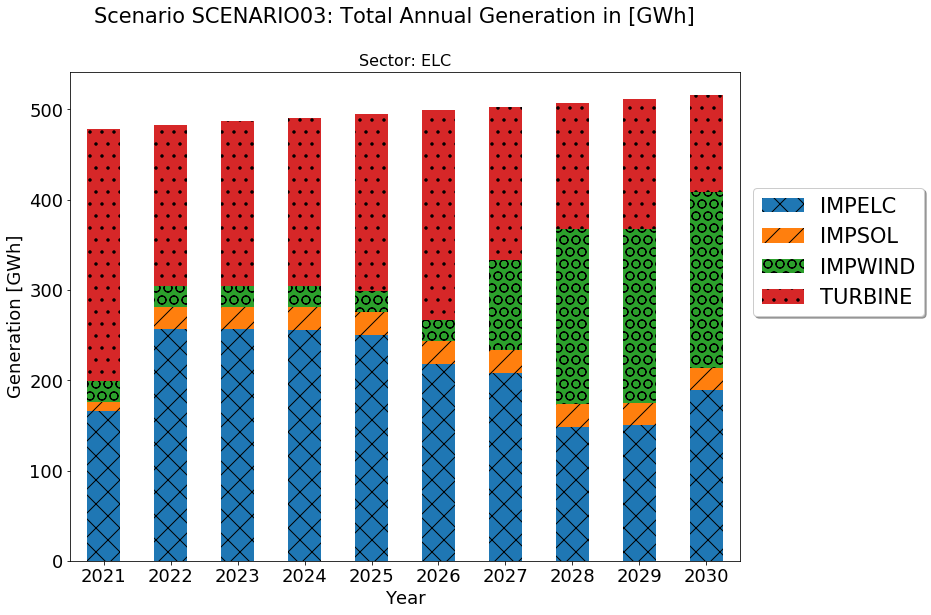

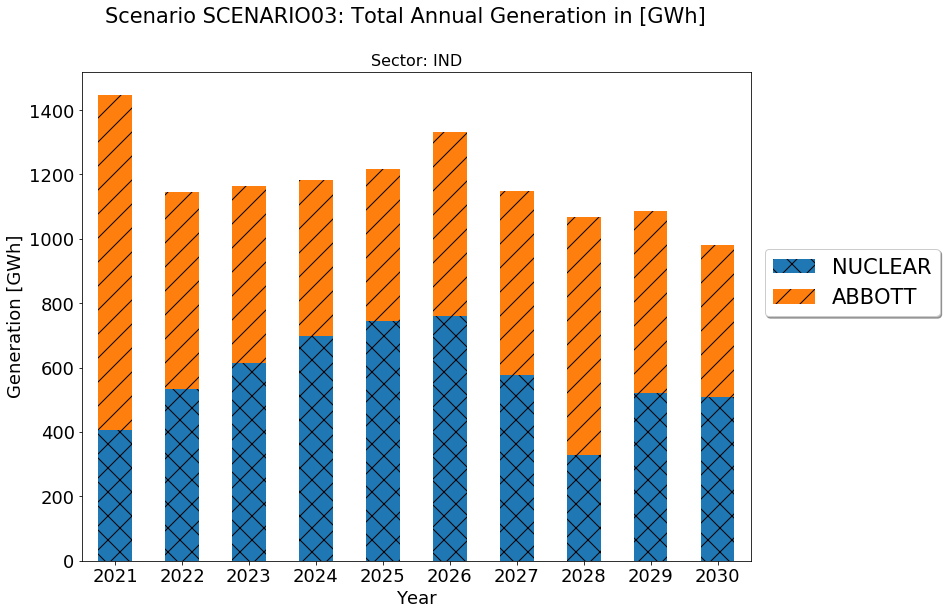

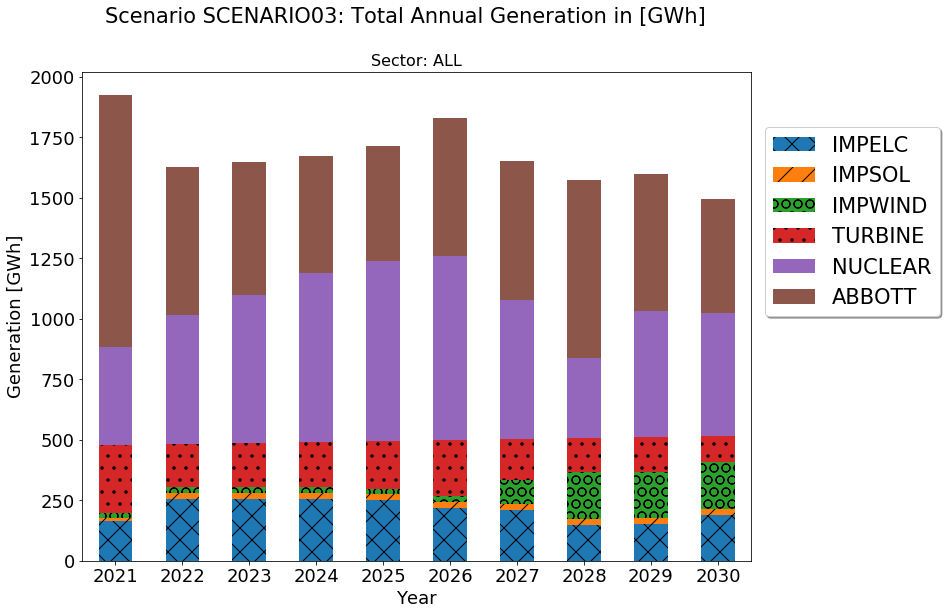

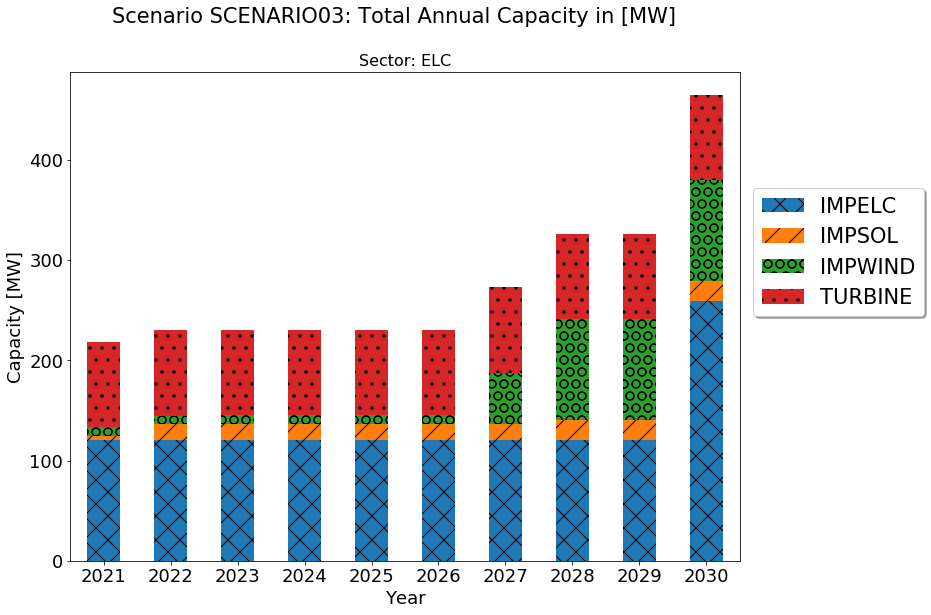

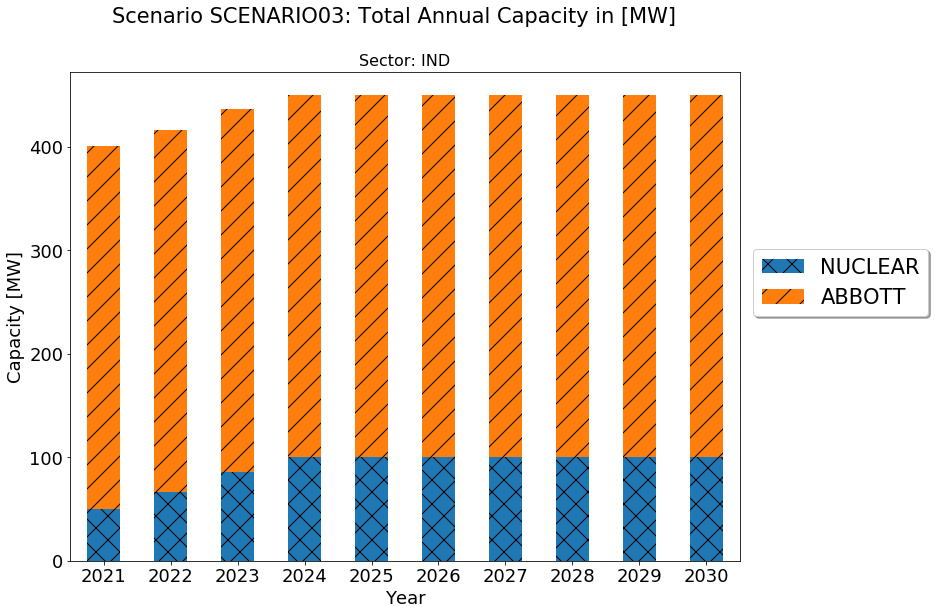

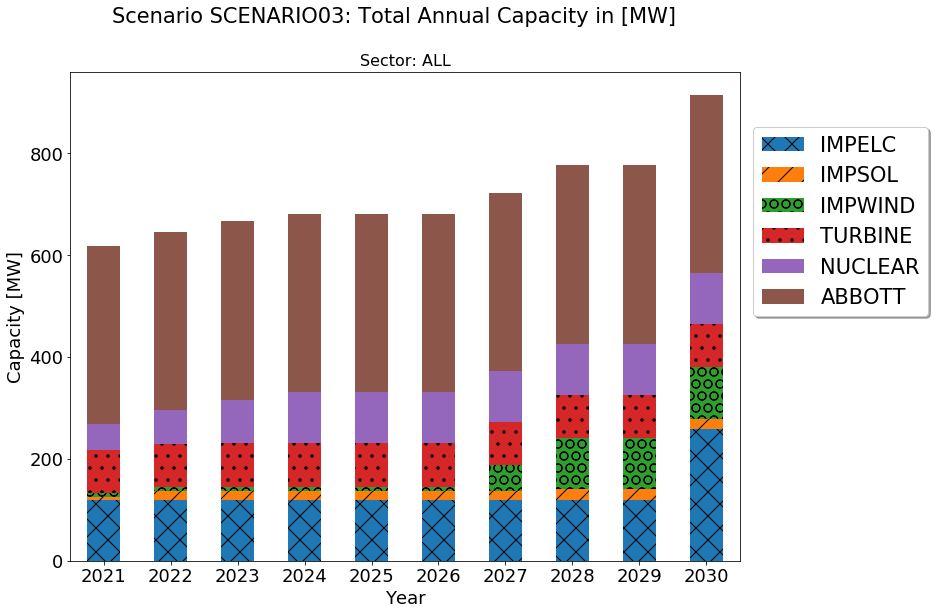

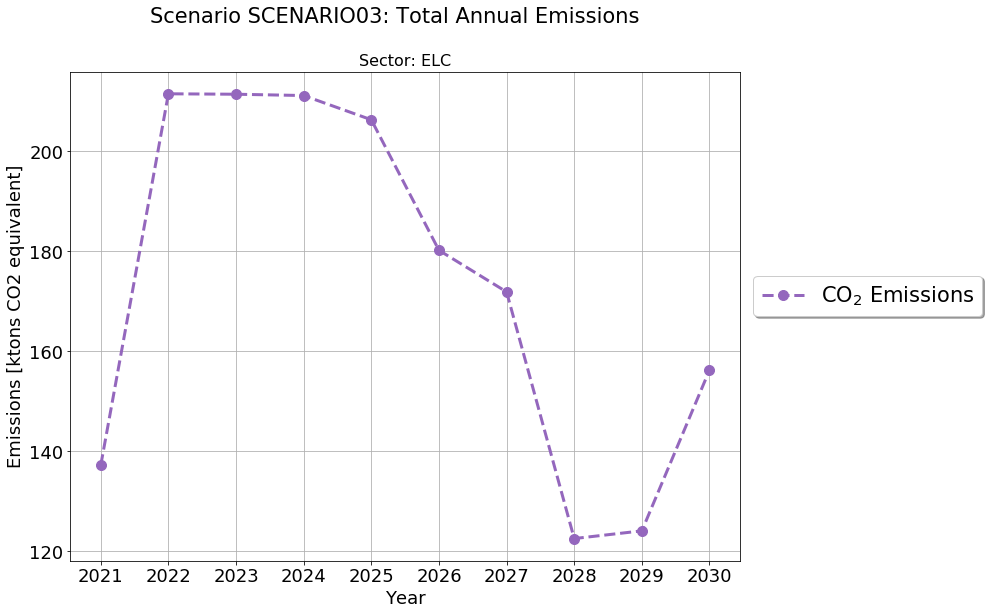

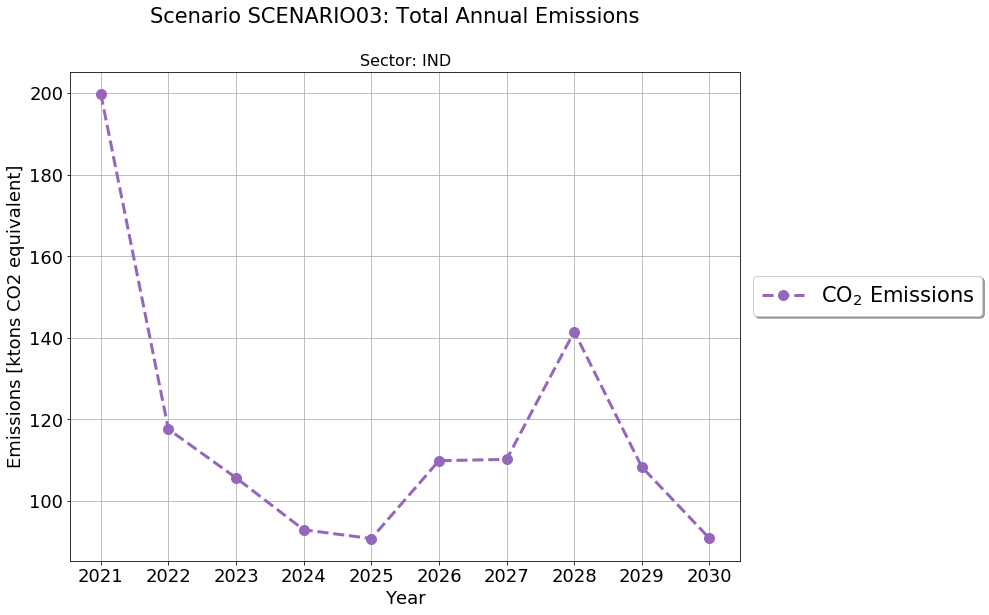

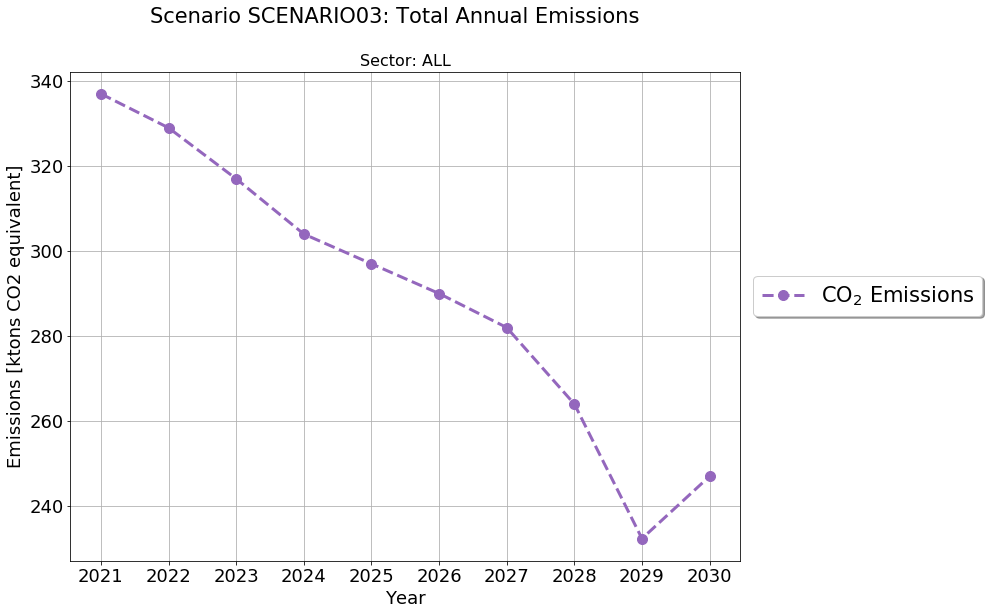

In [4]:
make_plots(output, False)

### Create BAU Generation Plot with 2014 Reference Year

In [5]:
output

['./data_files/02_uiuc_scenario02_model/scenario02_OutputLog.log',
 './data_files/bau_uiuc_bau_model/bau_OutputLog.log',
 './data_files/01_uiuc_scenario01_model/scenario01_OutputLog.log',
 './data_files/03_uiuc_scenario03_model/scenario03_OutputLog.log']

In [48]:
import pandas as pd
import numpy as np
from data_parser import get_scenario_name
from data_parser import parse_datalines
from data_parser import variables
from data_parser import create_dataframe
from data_parser import bar_plot

In [20]:
scenario = get_scenario_name(output[1])
datalines = parse_datalines(output[1])
df_elc = create_dataframe(datalines, 'Generation', sector='elc')

In [21]:
df_elc

,IMPELC,IMPSOL,IMPWIND,TURBINE
Year,,,,
2021,273.980658,6.88,23.350000,174.48934
2022,256.304938,24.69,23.350000,178.35507
2023,256.439208,24.69,23.350000,182.22079
2024,256.568638,24.69,23.350000,186.19136
2025,256.714468,24.69,23.350000,190.14553
2026,256.826455,24.69,23.350000,194.13355
2027,289.081387,24.69,53.628007,135.80061
2028,251.366857,24.69,91.511495,139.93165
2029,297.534827,24.69,45.468105,144.00707


Add data from [iCAP document](https://sustainability.illinois.edu/campus-sustainability/icap/)

In [33]:
yr2014 = pd.Series(data={'IMPELC-2014':199.788, 'TURBINE-2014':275.919}, name=2014)

In [34]:
df_elc2014 = df_elc.append(yr2014, ignore_index=False)

In [45]:
df_elc2014.fillna(0, inplace=True)

In [50]:
df_elc2014

,IMPELC,IMPSOL,IMPWIND,TURBINE,IMPELC-2014,TURBINE-2014
Year,,,,,,
2021,273.980658,6.88,23.350000,174.48934,0.000,0.000
2022,256.304938,24.69,23.350000,178.35507,0.000,0.000
2023,256.439208,24.69,23.350000,182.22079,0.000,0.000
2024,256.568638,24.69,23.350000,186.19136,0.000,0.000
2025,256.714468,24.69,23.350000,190.14553,0.000,0.000
2026,256.826455,24.69,23.350000,194.13355,0.000,0.000
2027,289.081387,24.69,53.628007,135.80061,0.000,0.000
2028,251.366857,24.69,91.511495,139.93165,0.000,0.000
2029,297.534827,24.69,45.468105,144.00707,0.000,0.000


In [51]:
df_elc2014.sort_index(inplace=True)

In [52]:
df_elc2014

,IMPELC,IMPSOL,IMPWIND,TURBINE,IMPELC-2014,TURBINE-2014
Year,,,,,,
2014,0.000000,0.00,0.000000,0.00000,199.788,275.919
2021,273.980658,6.88,23.350000,174.48934,0.000,0.000
2022,256.304938,24.69,23.350000,178.35507,0.000,0.000
2023,256.439208,24.69,23.350000,182.22079,0.000,0.000
2024,256.568638,24.69,23.350000,186.19136,0.000,0.000
2025,256.714468,24.69,23.350000,190.14553,0.000,0.000
2026,256.826455,24.69,23.350000,194.13355,0.000,0.000
2027,289.081387,24.69,53.628007,135.80061,0.000,0.000
2028,251.366857,24.69,91.511495,139.93165,0.000,0.000


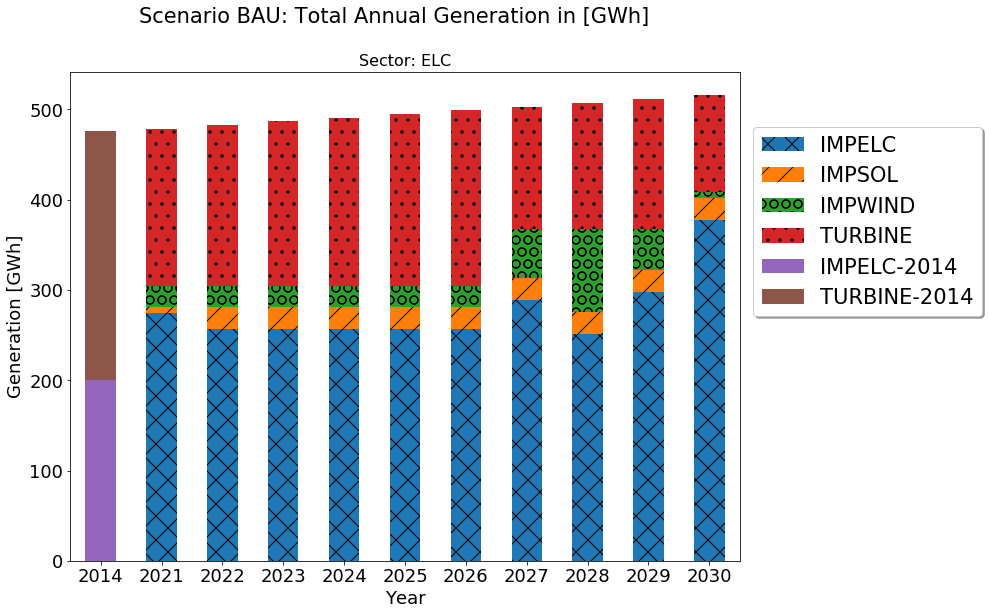

In [53]:
bar_plot(df_elc2014, 'Generation', 'BAU', 'elc', False)